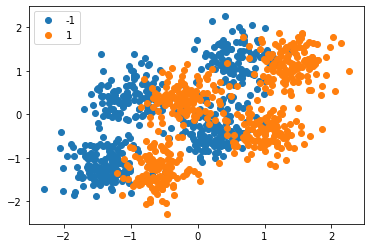

In [4]:
import scipy.io as spio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import color_palette, JointGrid


train_mat = spio.loadmat('dados_treinamento.mat')

X_train = train_mat['X']
y_train = train_mat['y']

# f = plt.scatter(X_train[:,0], X_train[:,1])
# f = plt.plot(x_0, y_0, linewidth=2, color='black')

df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train[:,0]))

groups = df.groupby('label')

# Plot
colors = color_palette(n_colors=len(groups))

fig, ax = plt.subplots()
# ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='upper left')

plt.show()

Train on 750 samples, validate on 250 samples
Epoch 1/200
750/750 [==============================] - 1s 1ms/sample - loss: 0.9950 - acc: 0.1373 - val_loss: 0.9786 - val_acc: 0.2360
Epoch 2/200
750/750 [==============================] - 0s 109us/sample - loss: 0.9704 - acc: 0.2080 - val_loss: 0.9357 - val_acc: 0.2480
Epoch 3/200
750/750 [==============================] - 0s 104us/sample - loss: 0.9280 - acc: 0.2693 - val_loss: 0.8950 - val_acc: 0.2560
Epoch 4/200
750/750 [==============================] - 0s 110us/sample - loss: 0.9031 - acc: 0.2960 - val_loss: 0.8656 - val_acc: 0.3120
Epoch 5/200
750/750 [==============================] - 0s 107us/sample - loss: 0.8713 - acc: 0.3267 - val_loss: 0.8446 - val_acc: 0.3160
Epoch 6/200
750/750 [==============================] - 0s 106us/sample - loss: 0.8569 - acc: 0.3280 - val_loss: 0.8254 - val_acc: 0.3400
Epoch 7/200
750/750 [==============================] - 0s 112us/sample - loss: 0.8466 - acc: 0.3307 - val_loss: 0.8208 - val_acc: 0.33

750/750 [==============================] - 0s 124us/sample - loss: 0.6998 - acc: 0.4213 - val_loss: 0.6376 - val_acc: 0.4440
Epoch 61/200
750/750 [==============================] - 0s 109us/sample - loss: 0.6886 - acc: 0.4320 - val_loss: 0.6352 - val_acc: 0.4400
Epoch 62/200
750/750 [==============================] - 0s 96us/sample - loss: 0.6980 - acc: 0.4227 - val_loss: 0.6355 - val_acc: 0.4240
Epoch 63/200
750/750 [==============================] - 0s 92us/sample - loss: 0.6920 - acc: 0.4307 - val_loss: 0.6336 - val_acc: 0.4400
Epoch 64/200
750/750 [==============================] - 0s 98us/sample - loss: 0.6982 - acc: 0.4280 - val_loss: 0.6377 - val_acc: 0.4240
Epoch 65/200
750/750 [==============================] - 0s 101us/sample - loss: 0.7062 - acc: 0.4107 - val_loss: 0.6353 - val_acc: 0.4280
Epoch 66/200
750/750 [==============================] - 0s 99us/sample - loss: 0.6892 - acc: 0.4213 - val_loss: 0.6318 - val_acc: 0.4400
Epoch 67/200
750/750 [=============================

750/750 [==============================] - 0s 162us/sample - loss: 0.6762 - acc: 0.4253 - val_loss: 0.6095 - val_acc: 0.4440
Epoch 120/200
750/750 [==============================] - 0s 137us/sample - loss: 0.6593 - acc: 0.4320 - val_loss: 0.6135 - val_acc: 0.4320
Epoch 121/200
750/750 [==============================] - 0s 151us/sample - loss: 0.6805 - acc: 0.4267 - val_loss: 0.6123 - val_acc: 0.4440
Epoch 122/200
750/750 [==============================] - 0s 158us/sample - loss: 0.6847 - acc: 0.4253 - val_loss: 0.6144 - val_acc: 0.4400
Epoch 123/200
750/750 [==============================] - 0s 139us/sample - loss: 0.6720 - acc: 0.4307 - val_loss: 0.6124 - val_acc: 0.4480
Epoch 124/200
750/750 [==============================] - 0s 151us/sample - loss: 0.6643 - acc: 0.4307 - val_loss: 0.6175 - val_acc: 0.4400
Epoch 125/200
750/750 [==============================] - 0s 160us/sample - loss: 0.6788 - acc: 0.4360 - val_loss: 0.6191 - val_acc: 0.4400
Epoch 126/200
750/750 [==================

750/750 [==============================] - 0s 128us/sample - loss: 0.6819 - acc: 0.4400 - val_loss: 0.6089 - val_acc: 0.4480
Epoch 179/200
750/750 [==============================] - 0s 139us/sample - loss: 0.6661 - acc: 0.4440 - val_loss: 0.6074 - val_acc: 0.4480
Epoch 180/200
750/750 [==============================] - 0s 110us/sample - loss: 0.6620 - acc: 0.4440 - val_loss: 0.6074 - val_acc: 0.4440
Epoch 181/200
750/750 [==============================] - 0s 128us/sample - loss: 0.6730 - acc: 0.4333 - val_loss: 0.6101 - val_acc: 0.4440
Epoch 182/200
750/750 [==============================] - 0s 126us/sample - loss: 0.6692 - acc: 0.4373 - val_loss: 0.6152 - val_acc: 0.4320
Epoch 183/200
750/750 [==============================] - 0s 122us/sample - loss: 0.6670 - acc: 0.4360 - val_loss: 0.6152 - val_acc: 0.4320
Epoch 184/200
750/750 [==============================] - 0s 98us/sample - loss: 0.6635 - acc: 0.4347 - val_loss: 0.6137 - val_acc: 0.4360
Epoch 185/200
750/750 [===================

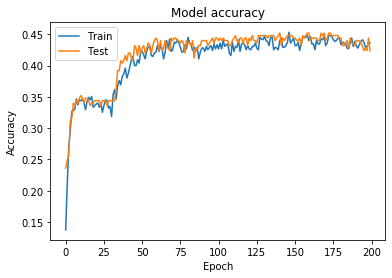

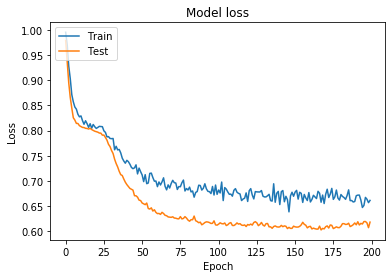

In [22]:
import tensorflow as tf
import scipy.io as spio
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

train_mat = spio.loadmat('dados_treinamento.mat')

x_train = train_mat['X']
y_train = train_mat['y']

test_mat = spio.loadmat('dados_val.mat')
x_test = test_mat['Xval']
y_test = test_mat['yval']
# x_test = train_mat['X']
# y_test = train_mat['y']

# binarizer = Binarizer().fit(y_train)  # fit does nothing

model = tf.keras.models.Sequential([
    #   tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), #relu, linear, 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'), #relu, linear,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'), #relu, linear, 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='mean_absolute_error',
              optimizer='rmsprop', # sgd, rmsprop, adagrad, adadelta 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.25, epochs=200, verbose=1)
model.evaluate(x_test, y_test)





# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()